## Initilize Spark

In [0]:
import pyspark

## Load the data

In [0]:
df = sqlContext.sql("SELECT * FROM  spotify_csv")

In [0]:
df.count()

Out[34]: 32833

In [0]:
from pyspark.sql.types import StringType

In [0]:
type(df.schema[0].dataType)

Out[36]: pyspark.sql.types.StringType

In [0]:
str_cols = []
nstr_cols = []
for i in df.schema:
    if(isinstance(i.dataType, StringType)):
        str_cols.append(i.name)
    else:
        nstr_cols.append(i.name)

In [0]:
str_cols

Out[38]: ['track_id',
 'track_name',
 'track_artist',
 'track_album_id',
 'track_album_name',
 'playlist_name',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre']

In [0]:
str_cols = ['track_id',
 'track_artist',
 'track_album_id',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre']

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

## Create Feature Vector

In [0]:
nstr_cols.remove('track_album_release_date')
assembler = VectorAssembler(inputCols=nstr_cols, outputCol="features")
final_data  = assembler.transform(df)

## StandardScaler

In [0]:
from pyspark.ml.feature import StandardScaler

In [0]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

In [0]:
scaler_model = scaler.fit(final_data)

In [0]:
final_data = scaler_model.transform(final_data)

# K means

In [0]:
from pyspark.ml.clustering import KMeans

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [0]:

evaluator = ClusteringEvaluator()


In [0]:
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(featuresCol='features', k=i)
    model = kmeans.fit(final_data)
    prediction = model.transform(final_data)
    silhouette = evaluator.evaluate(prediction)
    silhouettes.append(silhouette)

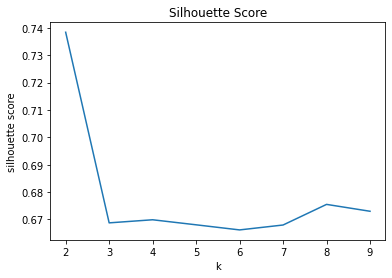

In [0]:
import matplotlib.pyplot as plt
  
plt.plot(range(2,10),silhouettes)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()

In [0]:
print("k = 3")

k = 3
